### Environment setup

In [ ]:
!pip install pynwb
!pip install matplotlib

In [23]:
from pynwb import NWBHDF5IO
import numpy as np
import matplotlib.pyplot as plt

### Read NWB files

In [24]:
lfp_filepath = "../../../data/probeA_lfp.nwb"
stim_filepath = "../../../data/spike_times.nwb"

In [25]:
lfp_io = NWBHDF5IO(lfp_filepath, mode="r", load_namespaces=True)
lfp_file = lfp_io.read()
stim_io = NWBHDF5IO(stim_filepath, mode="r", load_namespaces=True)
stim_file = stim_io.read() 

In [26]:
lfp = lfp_file.acquisition["probe_0_lfp_data"]
series = lfp.data

In [27]:
stimulus_names = list(stim_file.intervals.keys())
print(stimulus_names)

['ICkcfg0_presentations', 'ICkcfg1_presentations', 'ICwcfg0_presentations', 'ICwcfg1_presentations', 'RFCI_presentations', 'invalid_times', 'sizeCI_presentations', 'spontaneous_presentations']


### Visualizing stimuli

1. align stimulus and lfp
2. identify events within lfp
3. get window of lfp around event
4. split lfp eventwise into 3d array
5. calculate average across events
6. calculate average across nodes and events

In [28]:
stim_name = "ICwcfg1_presentations"
stim_table = stim_file.intervals[stim_name]

print({frame for frame in stim_table.frame})

{0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 11.0, 12.0, 13.0, 14.0, 15.0, 16.0, 17.0, 18.0, 19.0, 20.0, 21.0}


In [99]:
stim_table[100:150]

,start_time,stop_time,stimulus_name,stimulus_block,frame,stimulus_index,tags,timeseries
id,,,,,,,,
100,139.290235,139.690591,ICwcfg1,0.0,13.0,0.0,[stimulus_time_interval],"[(101, 1, timestamps pynwb.base.TimeSeries at ..."
101,139.690591,140.090946,ICwcfg1,0.0,0.0,0.0,[stimulus_time_interval],"[(102, 1, timestamps pynwb.base.TimeSeries at ..."
102,140.090946,140.491284,ICwcfg1,0.0,3.0,0.0,[stimulus_time_interval],"[(103, 1, timestamps pynwb.base.TimeSeries at ..."
103,140.491284,140.891605,ICwcfg1,0.0,0.0,0.0,[stimulus_time_interval],"[(104, 1, timestamps pynwb.base.TimeSeries at ..."
104,140.891605,141.291925,ICwcfg1,0.0,2.0,0.0,[stimulus_time_interval],"[(105, 1, timestamps pynwb.base.TimeSeries at ..."
105,141.291925,141.692269,ICwcfg1,0.0,0.0,0.0,[stimulus_time_interval],"[(106, 1, timestamps pynwb.base.TimeSeries at ..."
106,141.692269,142.092612,ICwcfg1,0.0,8.0,0.0,[stimulus_time_interval],"[(107, 1, timestamps pynwb.base.TimeSeries at ..."
107,142.092612,142.492946,ICwcfg1,0.0,0.0,0.0,[stimulus_time_interval],"[(108, 1, timestamps pynwb.base.TimeSeries at ..."
108,142.492946,142.893271,ICwcfg1,0.0,13.0,0.0,[stimulus_time_interval],"[(109, 1, timestamps pynwb.base.TimeSeries at ..."


In [81]:
select_frame = 13.0

In [82]:
### extract timestamps for given stimulus frame

stim_timestamps = []
prev_frame = None
for i in range(len(stim_table)):
    row = stim_table[i]
    if row.frame[i] != prev_frame and row.frame[i] == select_frame:
        stim_timestamps.append(row.start_time[i])
    prev_frame = row.frame[i]
print(stim_timestamps)

[128.08084646720096, 139.29023498262623, 142.492946467201, 148.09768446720096, 175.32051498262624, 188.13134646720096, 236.17172846720095, 242.577108467201, 250.583848467201, 254.58722046720095, 260.19194246720093, 329.8504967249136, 343.4619449826262, 347.4652849826262, 358.6747204672009, 363.47873498262624, 370.68482046720095, 371.4854849826263, 375.4888249826262, 377.0902127249136, 411.51910498262623, 428.33328046720095, 447.5494449826262, 481.9783927249136, 502.795910467201, 505.9985747249136, 510.802626467201, 523.6133649826262, 526.0154287249137, 529.2181067249136, 541.2282127249135, 551.6369649826262, 559.6436749826262, 562.846384467201, 571.6537649826262, 589.2686027249135, 590.0692787249136, 592.4712984672009, 596.474656467201, 603.6807049826263, 614.890148467201, 617.2921567249136, 618.0928247249136, 630.903616467201, 651.7210749826262, 661.3291587249136, 666.9338924672011, 674.1399267249136, 687.7513849826262, 695.7581149826262, 702.1635207249136, 719.7783249826263, 720.5790

In [83]:
### get closest corresponding lfp index to the stimulus timestamps

lfp_events = []
lfp_ts_idx = 0
for stim_ts in stim_timestamps:

    lfp_ts = lfp.timestamps[lfp_ts_idx]
    while(lfp_ts < stim_ts):
        lfp_ts_idx += 1
        lfp_ts = lfp.timestamps[lfp_ts_idx]
    lfp_ts_idx -= 1
    lfp_events.append(lfp_ts_idx)

print(lfp_events)

[154117, 168129, 172132, 179138, 213166, 229180, 289231, 297237, 307246, 312250, 319256, 406329, 423343, 428348, 442359, 448364, 457372, 458373, 463377, 465379, 508415, 529433, 553453, 596489, 622511, 626514, 632520, 648533, 651536, 655539, 670552, 683562, 693571, 697574, 708584, 730602, 731603, 734605, 739610, 748617, 762629, 765632, 766632, 782646, 808668, 820678, 827684, 836691, 853706, 863714, 871721, 893739, 894740, 897743, 908752, 922764, 926767, 927768, 949787, 960796, 962798, 970804, 1005834, 1006835, 1023849, 1068887, 1081898, 1113925, 1116927, 1139947, 1154959, 1161965, 1164968, 1179980, 1205001, 1210006, 1243033, 1244034, 1250039, 1295077, 1329106, 1354127, 1370140, 1389156, 1398164, 1408172, 1425187, 1438198, 1446204, 1448206, 1453210, 1464220, 1467222, 1487239, 1505254, 1507256, 1508257, 1538282, 1539283, 1542285, 1547290, 1558299, 1559300, 1593328, 1609342, 1613345, 1629359, 1630359, 1656381, 1671394, 1672395, 1686407, 1710427, 1716432, 1724439, 1727441, 1731445, 1732445,

In [95]:
interval_start = -0.05
interval_end = 0.25

In [96]:
# get lfp data intervals for viewing

if interval_start > 0:
    raise ValueError("interval start must be non-positive")
if interval_end <= 0:
    raise ValueError("interval end must be positive")
    
lfp_event_intervals = []
for lfp_event in lfp_events:
    event_ts = lfp.timestamps[lfp_event]
    
    # iterate backward to get start time idx
    start_idx = lfp_event
    start_ts = lfp.timestamps[start_idx]
    while(start_ts > event_ts + interval_start):
        start_idx -= 1
        if start_idx < 0:
            break
        start_ts = lfp.timestamps[start_idx]
    
    # iterate forward to get end time idx
    end_idx = lfp_event
    end_ts = lfp.timestamps[end_idx]
    while(end_ts < event_ts + interval_end):
        end_idx += 1
        if end_idx >= len(lfp.timestamps):
            break
        end_ts = lfp.timestamps[end_idx]
    
    if start_idx >= end_idx:
        raise ValueError("interval too small")
        
    lfp_event_intervals.append((start_idx, end_idx))
    print(f"Interval for event at {lfp_event}: {start_idx},{end_idx}")

Interval for event at 154117: 154054,154430
Interval for event at 168129: 168066,168442
Interval for event at 172132: 172069,172445
Interval for event at 179138: 179075,179451
Interval for event at 213166: 213103,213479
Interval for event at 229180: 229117,229493
Interval for event at 289231: 289168,289544
Interval for event at 297237: 297174,297550
Interval for event at 307246: 307183,307559
Interval for event at 312250: 312187,312563
Interval for event at 319256: 319193,319569
Interval for event at 406329: 406266,406642
Interval for event at 423343: 423280,423656
Interval for event at 428348: 428285,428661
Interval for event at 442359: 442296,442672
Interval for event at 448364: 448301,448677
Interval for event at 457372: 457309,457685
Interval for event at 458373: 458310,458686
Interval for event at 463377: 463314,463690
Interval for event at 465379: 465316,465692
Interval for event at 508415: 508352,508728
Interval for event at 529433: 529370,529746
Interval for event at 553453: 55

Interval for event at 2617190: 2617127,2617503
Interval for event at 2624196: 2624133,2624509
Interval for event at 2625197: 2625134,2625510
Interval for event at 2688250: 2688187,2688563
Interval for event at 2696257: 2696194,2696570
Interval for event at 2710269: 2710206,2710582
Interval for event at 2717274: 2717211,2717587
Interval for event at 2718275: 2718212,2718588
Interval for event at 2723279: 2723216,2723592
Interval for event at 2739293: 2739230,2739606
Interval for event at 2780327: 2780264,2780640
Interval for event at 2801345: 2801282,2801658
Interval for event at 2807350: 2807287,2807663
Interval for event at 2819360: 2819297,2819673
Interval for event at 2825365: 2825302,2825678
Interval for event at 2826366: 2826303,2826679
Interval for event at 2841379: 2841316,2841692
Interval for event at 2854390: 2854327,2854703
Interval for event at 2867401: 2867338,2867714
Interval for event at 2879411: 2879348,2879724
Interval for event at 2886417: 2886354,2886730
Interval for 

In [104]:
node = 1
event_num = 100

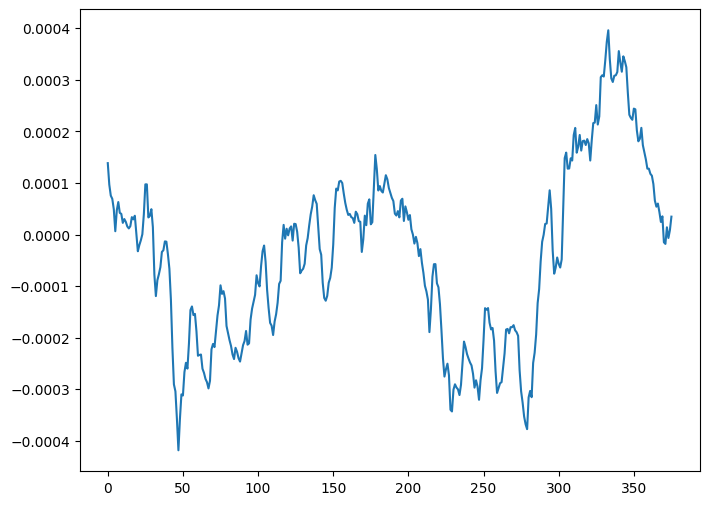

In [105]:
# nodewise view
%matplotlib inline
fig, ax = plt.subplots(figsize=(8, 6))
start_idx, end_idx = lfp_event_intervals[event_num]
ax.plot(lfp.data[start_idx:end_idx,node])
plt.show()